In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

//anaconda/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [49]:
boston = load_boston()

In [51]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [54]:
dataset['target'] = boston.target

In [55]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.ix[:,:-1]
y = dataset['target'].values

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Можно делать модель просто передавая матрицы, но тогда нужно добавлять константу.

In [58]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

In [81]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 13 May 2016   Prob (F-statistic):          6.95e-135
Time:                        10:36:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

|Name|Description|
|--|-------------------------------|
|Df Residuals |Степени свободы residuals (остатки, невязки, ошибки, (y-y_pred)).Рассчитываются, как n строк - n переменных|
|Df model |Степени свободы модели, рассчитывается как n переменных -1 (исключаем константу)|
|R-squared |Коэффициент детерминации. Показывает насколько модель лучше по сравнению с просто средним значением по всем ответам|
|Adj. R-squared: |Коэффициент детерминации c поправками. Дело в том, что чем больше в моделе переменных - тем больше будет становиться R-squared. Adj. R-squared рассчитывается с поправкой на кол-во переменных и показывает более реальное значение. Он всегда ниже обычного и когда мы работаем с множественной регрессией, то смотреть нужно именно на него. Так же есть правило, что если разница между двумя коэффициентами детерминации больше 20%, то в моделе присутствуют redundunt переменные, т.е. переменные, которые не окзазывают никакого влияния на целевую переменную|
|F-statistic: |F статистика для нулевой гипотезы, что все коэффициенты (кроме константы) равны нулю. Т.е. гипотеза о том, что модель не отличается от простого среднего.|
|Prob (F-statistic):|Вероятность получить F статиску из предыдущего пункта просто случайно. Если эта величина мала, то есть основания считать, что модель лучше чем среднее. Порог 0.05 применим так же как и во всех случаях с гипотезами и p-value|
|Log-Likelihood:|Функция логистических потерь. (надо проверить)|
|AIC:|[Akaike Information Criterion](https://ru.wikipedia.org/wiki/Информационный_критерий_Акаике). Чем меньше - тем лучше. Полезен для сравнения моделей и статистического отбора переменных.|
|BIC:|[Bayesian Information Criterion](https://ru.wikipedia.org/wiki/Информационный_критерий). Смысл такой же, как и предыщего критерия. Больше штрафует модели с большим кол-во переменных|
|coef: |The estimated coefficient|
|std err: |The standard error of the estimate of the coefficient; the larger it is, the more uncertain the estimation of the coefficient|
|t: |The t-statistic value, a measure indicating whether the coefficient true value is different from zero|
|P > t: |The p-value indicating the probability that the coefficient is different from zero just by chance|
|[95.0% Conf. Interval]: |The lower and upper values of the coefficient, considering 95% of all the chances of having different observations and so different estimated coefficients|
|Omnibus: |Это совмещенный тест для kurtosis и skew. [Omnibus](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) По сути это тес на нормальность.|
|Prob(Omnibus):|Вероятность получить такую статистику из нормального распределения. Кстати, нужно понимать, что все тесты из последней таблице выполнены для residuals!!!|
|Skew:|Мера симметрии остатков относительно стреднего. Для симметричных распределения должно быть около 0. Положительно значение говорить о длинном правом хвосте, отрицательно - о левом|
|Kurtosis:|Мера формы распределения residuals. Колоколобразная форма имеет 0 kurtosis, Отрицательное значение говорит о плоской форме. Положительное - о большом количестве пиков.|
|[Durbin-Watson](https://ru.wikipedia.org/wiki/Критерий_Дарбина_—_Уотсона)|Тест на автокорреляцию среди resuduals. Используется при анализе временных рядов.|
| Jarque-Bera (JB):|[Jarque-Bera](https://ru.wikipedia.org/wiki/Тест_Харке_—_Бера). Тест на нормальность resuduals, так же совмещающий skew и kurtosis. |
|Prob(JB):|Веороятноть получить такую статистику из норм распр.|
|Cond. No.|Тест на мультиколлениарность. Если больше 30, то ясный сигнал о том, что есть мульти коллениарность.|

А можно использовать другой интерфейс и передавать формулу.

In [61]:
' + '.join(dataset.columns[:-1])

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [62]:
formula = 'target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [63]:
linear_regression = smf.ols(formula,dataset)
fitted_model = linear_regression.fit()
correlation_matrix = X.corr()

In [66]:
print correlation_matrix

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

Чтобы детектить зависимоть среди переменных строят хит-мэп из матрицы корреляций с порогом.

In [90]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', \
                    top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

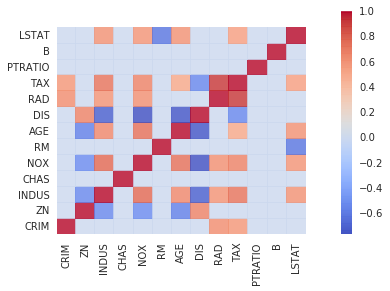

In [91]:
visualize_correlation_matrix(X, hurdle=0.5)

Так же есть более автоматизированный метод поиска, основанный на собственных векторах.

In [92]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

Смотрим на собственные величины ищем самые маленькие и близкие нюлю.

In [99]:
np.argmin(eigenvalues)

8

Берем соответсвующее значение и смотрим на собственный вектор.

In [94]:
eigenvectors[:,8]

array([ 0.04552843, -0.08089873, -0.25126664,  0.03590431,  0.04389033,
        0.04580522, -0.03870705, -0.01828389, -0.63337285,  0.72024335,
        0.02350903, -0.00485021,  0.02477196])

Здесь так же находим выбивающиеся значение и смотрим, на каких переменных они получились.

In [95]:
print (variables[2], variables[8], variables[9])

('INDUS', 'RAD', 'TAX')


Это как раз те переменных, которые мы заметили на хит-мэп.

In [96]:
eigenvectors[:,0]

array([ 0.24959319, -0.25652131,  0.3468611 ,  0.005099  ,  0.34297566,
       -0.18943673,  0.31385097, -0.32173451,  0.31981745,  0.33853899,
        0.20502118, -0.20273245,  0.30984085])

Сравнивать коэффициенты можно только после стандартизации, т.к. иначе в коэффициент будет заложена шкала того или иного признака.

In [100]:
from sklearn.linear_model import LinearRegression

In [102]:
linear_regression = LinearRegression(normalize=False, fit_intercept=True)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization,
                                      linear_regression)

Сначала выведем коэффициенты для изначальных данных.

In [104]:
linear_regression.fit(X,y)

for coef, var in sorted(zip(map(abs,linear_regression.coef_), 
           dataset.columns[:-1]), reverse=True):
           print ("%6.3f %s" % (coef,var))

17.796 NOX
 3.805 RM
 2.689 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.107 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [106]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in \
sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), \
dataset.columns[:-1]), reverse=True):
              print ("%6.3f %s" % (coef,var))

 3.749 LSTAT
 3.104 DIS
 2.671 RM
 2.659 RAD
 2.076 TAX
 2.062 PTRATIO
 2.060 NOX
 1.081 ZN
 0.920 CRIM
 0.857 B
 0.682 CHAS
 0.143 INDUS
 0.021 AGE


Теперь можно потестиь r2_score поочередно исключая из модели ту или иную переменную.

In [109]:
from sklearn.metrics import r2_score
linear_regression = LinearRegression(normalize=False,\
                                                  fit_intercept=True)
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y)) 

Baseline R2: 0.741


In [111]:
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - \
                       r2_est(X.values [:,selection],y)) ,dataset.columns[j]))

for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.057 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 TAX
 0.006 CRIM
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


Такой анализ называется partial r-square. 

Использую эти два способа отбора переменных можно исключить какие-нибудь. Важно помнить, что после каждого исключения нужно пересчитывать показатели важности.

Теперь об открытии нелинейных отношений.

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = LinearRegression(normalize=False,\
                                                  fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2, \
                                         interaction_only=True, include_bias=False)

In [114]:
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

In [115]:
baseline = r2_est(X,y)
print ('Baseline R2: %0.3f' % baseline)

Baseline R2: 0.741


In [116]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

Если новая фича дает инкремент больше порога, то печатаем ее.

In [120]:
for k,effect in enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[effect==1]
    increment = r2_est(Xi[:,list(range(0,main_effects)) \
                          +[main_effects+k]],y) - baseline
    if increment > 0.01:
        print ('Adding interaction %8s *%8s R2: %5.3f' %  \
          (termA, termB, increment))

Adding interaction     CRIM *    CHAS R2: 0.011
Adding interaction     CRIM *      RM R2: 0.021
Adding interaction       ZN *      RM R2: 0.013
Adding interaction    INDUS *      RM R2: 0.038
Adding interaction    INDUS *     DIS R2: 0.013
Adding interaction      NOX *      RM R2: 0.027
Adding interaction       RM *     AGE R2: 0.024
Adding interaction       RM *     DIS R2: 0.018
Adding interaction       RM *     RAD R2: 0.049
Adding interaction       RM *     TAX R2: 0.054
Adding interaction       RM * PTRATIO R2: 0.041
Adding interaction       RM *       B R2: 0.020
Adding interaction       RM *   LSTAT R2: 0.064


In [122]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print ('R2 of a model with RM*LSTAT interaction: %0.3f' % \
       r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805


Следующая строка избавляет от научной нотации типа 1e-7

In [133]:
np.set_printoptions(precision=5, suppress=True)

Трансформации признаков для того чтобы пофиксить нелинейность

|Function names| Functions|Comment|
|-------------------|--------------------|------------------------|
|Logarithmic|np.log(x)| Можно добавить константу np.log(x+1) |
|Exponential|np.exp(x)|-|
|Squared|x**2|-|
|Cubed|x**3|-|
|Square root|np.sqrt(x)|-|
|Cube root|x**(1./3.)|-|
|Inverse|1. / x|-|

Эта книга просто кладезь крутых тем. https://www.packtpub.com/big-data-and-business-intelligence/regression-analysis-python

“If you are wondering what kind of regularization to use first, ridge or lasso, a good rule of thumb is to first run a linear regression without any regularization and check the distribution of the standardized coefficients. If there are many with similar values, then ridge is the best choice; if instead you notice that there are a few important coefficients and many lesser ones, using lasso is advisable to remove the unimportant ones. In any case, when you have more variables than observations, you should always use lasso.”

Excerpt From: Luca Massaron. “Regression Analysis with Python.” iBooks. 

Глава про genelize - просто бомба!